# Introducción al Machine Learning con Python.

### Basado en el libro [Introduction to Machine Learning with R](https://www.oreilly.com/library/view/introduction-to-machine/9781491976432/)

#### **Autor:** Marlon Algarra

## Capítulo 1: ¿Qué es un Modelo?

Los modelos son aspectos importantes en el mundo de Machine Learning, y a su vez, el Machine Learning poco a poco a empezado a ser más usado en ambientes tanto industriales, como académicos. Pero contrario a lo que se pensaría, no hace falta tener un nucleo de preparación en ciencias de la computación, en cambio, lo primordial es tener un entendimiento de sus modelos.

Aunque las gráficas convencionales son útiles para visualizar y entender de cierta manera unos datos, son estáticos. Por otro lado,los modelos ofrecen una visualización y entendimiento claro de lo que ya pasó, o lo que sabemos, y un vistazo de lo que puede ser el futuro. 

De una manera más formal, se puede asegurar que un modelo es una función con poder predictivo.

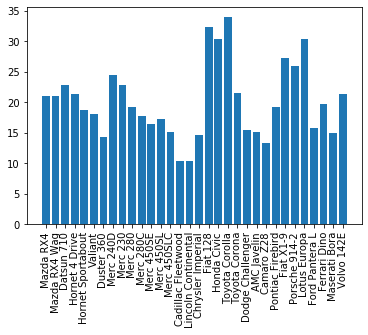

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')
data.rename(columns={'Unnamed: 0':'brand'}, inplace=True)
plt.bar(data['brand'],data['mpg']); plt.xticks(rotation=90)
plt.show()

*Figura 1-1. Una distribución de la eficiencia de combustible de vehículos, basado en el conjunto de datos [mtcars](https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv)* 

Esta gráfica no es muy interesante. A pesar de que poder observar la distribución de la eficiencia de combustible está bien, es posible manejar esa información de una manera mejor para poder hacer predicciones.

Lo primero que hay que hacer, para obtener algo más útil, es entender el conjunto de datos con el que se está trabajando:

In [2]:
data.head()

,brand,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


En el mundo del machine learning, cuando se tiene un conjunto de datos tabular como este, usualmente las columnas son llamadas características, o en inglés: *Features*. 

Ahora que se ha observado que columnas posee el conjunto de datos y como son, se puede ver si hay una relación entre la eficiencia del combustible y alguna otra de las características, visto en la *Figura 1-2:* 

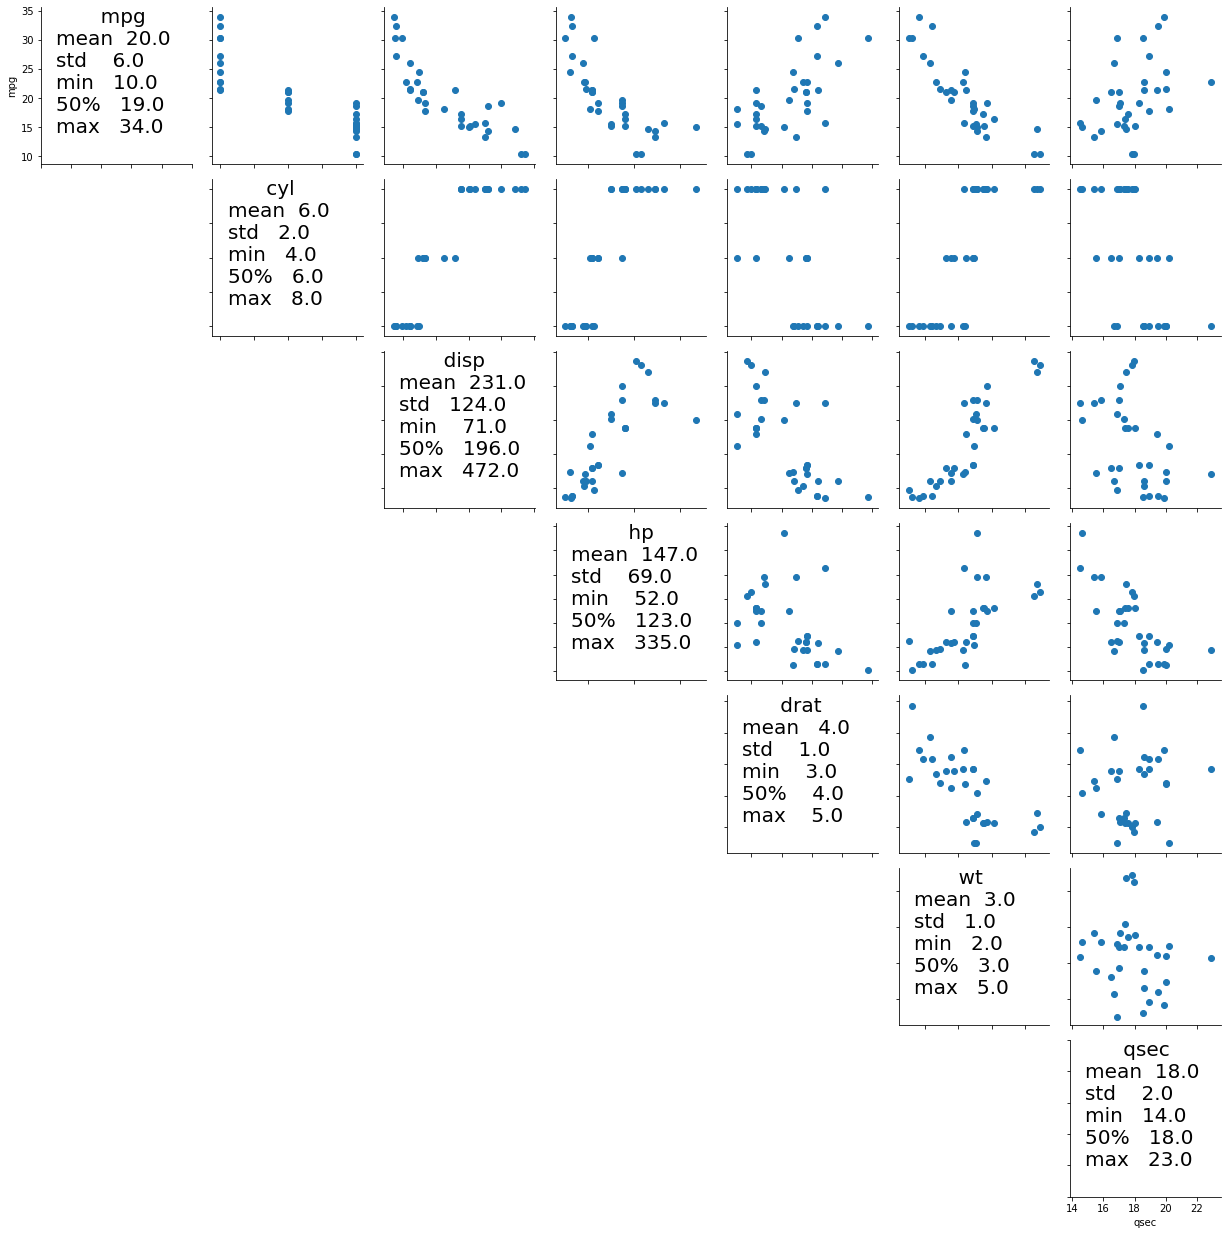

In [3]:
import seaborn as sns
pair_data=data.iloc[:, 0:8].copy()
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
def summary(x, **kwargs):
    label = pd.Series(x).describe()[['mean', 'std', 'min', '50%', 'max']]; label = label.round()
    ax = plt.gca()
    ax.set_axis_off()
    ax.annotate(str(pd.DataFrame(label)), xy = (0.1, 0.2), size = 20, xycoords = ax.transAxes) 
    
g = sns.PairGrid(pair_data)
g=g.map_upper(plt.scatter); g=g.map_lower(hide_current_axis); g=g.map_diag(summary)

*Figura 1-2. Una gráfica de pares del conjunto de datos [mtcars](https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv), concentrado en las primeras siete columnas* 

Cada caja es una gráfica separada, donde la variable dependiente es la variable escrita en el fondo de la columna, y la variable independiente es la variable escrita al comienzo de la fila. 

Algunas de estas gráficas son más interesantes para ver su comportamiento que otras, por ejemplo, se puede ver que las gráficas en la fila de **cyl** no son candidatas favorables para aplicar un modelo de regresión.

Pensando en el objetivo, interesa más observar más detalladamente algo que pueda tener una relación cuantificable. En este caso, se utilizará la relación de *mpg* como función de *wt*, visto en la *Figura 1-3:*

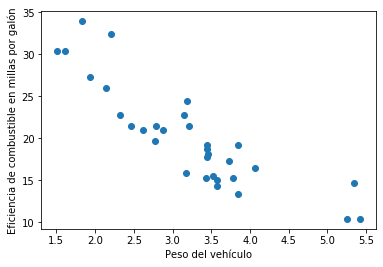

In [4]:
plt.scatter(data['wt'],data['mpg']);
plt.ylabel("Eficiencia de combustible en millas por galón"); plt.xlabel("Peso del vehículo");

*Figura 1-3. Esta gráfica es la base para dibuhar una linea de regresión a través de los datos*

Ahora se tiene un conjunto de datos más interesante, en este caso la eficiencia de combustible versus el peso del vehículo en toneladas. Teniendo los datos en ente formato, se puede extraer un ajuste a todos los datos y convertir esta gráfica en una ecuación:

In [5]:
from sklearn import linear_model
import numpy as np

reg = linear_model.LinearRegression()
x_reg=np.array(data['wt']).reshape((-1, 1)); y_reg=np.array(data['mpg'])
reg.fit(x_reg,y_reg)
print('Pendiente:',reg.coef_)
print('Coeficiente:',reg.intercept_)
print('Eficiencia de combustible =',reg.coef_[0],'x Peso del vehículo +',reg.intercept_)

Pendiente: [-5.34447157]
Coeficiente: 37.28512616734204
Eficiencia de combustible = -5.344471572722679 x Peso del vehículo + 37.28512616734204


En la última parte de código, se ha modelado la eficiencia de combustible como función del peso del vehículo. Ahora, si se quiere saber cual es la eficiencia de combustible para cualquier carro, sin importar que estén en el conjunto de datos o no, solo se necesita poner el peso de vehículo en la función obtenida para obtener el resultado. Este modelo puede tener limitaciones, pero es una manera de expandir y sacarle jugo a los datos más allá de unas gráficas estáticas. 

Este tipo particular de modelo de Machine learning es llamado regresión lineal. Es de los modelos más simples.

### Algoritmos Versus Modelos: ¿Cuál es la diferencia?

Los algoritmos y el Machine Learning están estrechamente relacionados. Los algoritmos a pesar de ser un tema tan extenso, pueden llegar a tener una definición muy simple: *Un Algoritmo es un conjunto de pasos llevados a cabo en orden*. Esta definición hace ver que los algoritmos no son únicamente algo de computadores, pues hay algoritmos en la vida diaria, como por ejemplo ponerse unos zapatos, o la rutina antes de ir a trabajar. Sin embargo, el conjunto de pasos para producir un algoritmo de machine learning, son más complejos.

Entonces, un modelo de machine learning, como regresión o redes neuronales, se basa en el resultado de algoritmos que ayudan a que funcionen en primer lugar. Los algoritmos son el motor que cualquier lenguaje de programación puede correr, pues le indican que hacer y como realizar los calculos o procesos que se deben hacer con los datos al lenguaje de programación.

En este caso, Python es una opción muy buena para trabajar Machine Learning, pues contiene un ecosistema de librerías diseñadas específicamente para esto. Haciendo posible realizar tareas tanto de regresión, clasificación y mixtas. Ya se ha visto un modelo de regresión. Un modelo de clasificación es diferente, porque la tarea consiste en, dada una entrada de datos, hacerla corresponder a una clase dentro de un conjunto finito, de tipo discreto. Los modelos mixtos consisten en dado una entrada de datos, obtener usando primero alguno de los dos modelos otra entrada, que será utilizada en el modelo restante para obtener el resultado final.

### Terminología:

Ya que pueden llegar a ser confusos algunos terminos como "Función" o "Ecuación" intuitivamente, se dará una definición de algunos terminos importantes que se usarán frecuentemente:

* Función: Un objeto que tiene algun poder de procesamiento, seguramente actue dentro de un modelo.
* Modelo: Un objeto complejo que toma un parametro de entrada y retorna un resultado.
* Equación: Una representación matemática de una función. Generalmente un modelo matemático.
* Algoritmo: Un conjunto de pasos que se pasan a un modelo para su cálculo o procesamiento. 

Estas definiciones pueden llegar a ser confusas si se mezclan en un ambito diferente o si se quiere rigurosidad en otro enfoque. 

### Limitaciones en el modelamiento:

Un modelo es una versión simplificada de la realidad. En la realidad, los sistemas son complejos y siempre cambiantes. Al ser el humano capaz de descubir patrones y darle sentido al universo que le rodea, pero también ser sus sentidos limitados, todos los modelos, sean del tipo que sea, al ser creación humana, también son limitados.

Las limitaciones pueden provenir de muchas fuentes, por ejemplo, usando el conjunto de datos mtcars, las limitaciones vienen de los propios datos, específicamente en la fecha en que se recolectaron y la reducida cantidad. Es decir que no es sensato decir que el modelo realizado antes es fidedigno para cualquier carro. Hay que remarcar entonces las limitaciones del modelo.

Diferentes modelos tienen limitaciones especificas diferentes también. Independientemente de esto, es necesario conocer el error de un modelo, y cabe aclarar, que cada modelo tiene un tipo de medida de error diferente. Al ser entonces los modelos imperfectos, el machine learning es solo una aproximación del problema estudiado. 

Las limitaciones del modelo también pueden estar dadas por su velocidad computacional o la habilidad de ser explicado o utilizado en un marco particular. Es importante entonces experimentar y probar los datos con tantos modelos como sea posible para asi poder escoger cual se acerma más a las metas que se tengan.

### Estadística y Modelamiento computacional

Cuando se piensa en Machine Learning, en un sentido ingenuo se piensa casi exclusivamente en computadores. Realmente, el Machine Learning tiene sus basos en las matemáticas y la estadística. Pero al tener calculos tan grandes que hacer, se hace imposible pensar en hacerlos a mano, sin embargo, los lenguajes de programación modernos como Python, cuentan con muchas funciones que hacen posible que esos procesos matemáticos sean menos tediosos y muchos más rápidos. Esto hace que el entendimiento estadístico y matemático sea primordial para usar estas herramientas de la manera más efectiva posible.

Teniendo en cuenta la regresión lineal usanda antes en unas cuantas lineas de código, estadísticamente hay que tener en cuenta estos terminos:

* Coeficiente de determinación: Algunas veces llamada R<sup>2</sup>, esta es la medida para determinar que tan bien los datos se acomodan a la linea modelada para el análisis de regresión

* p-*valores*: Estos son las medidad de la validación estadística. Si un p-valor es mejor que 0.05, el valor que se está examinando es probablemente estadísticamente valido.

* Intervalos de confianza: Estos son dos valores entre los que esperamos que esté un parámetro. Por ejemplo, el intervalo de confianza del 95% entre los números 1 y 3 podría describir dónde el número 2 esté.

Se pueden usar estos terminos para entender la diferencia entre un modelo que se ajuste a los datos bien, y otro que no.

### Datos de entrenamiento

Los modelos de Machine Learning requieren que primero se entrene un modelo de datos. Es decir, se tienen los datos con los cuales se quiere una predicción, entonces se pasan esos datos a través de un modelo y se obtiene un resultado, para después hacer una evaluación del modelo y ver que tan alto es el error.

Es importante que se tengan conjuntos de datos separados para realizar el entrenamiento y para realizar la validación, de otra manera el modelo será sospechosmente exacto a la hora de validación, porque se tendría que validar con los mismos datos de entrenamiento, y este ya sabría las respuestas.

Es frecuente que la cantidad de datos y su disponibilidad sea un problema. Así que hay que manejar el conjunto de datos que se tiene de buena manera, usando métodos efectivos de separación llamado técnicas de muestreo.

### Validación cruzada

Los datos de entrenamiento es clave a la hora de afinar los modelos de Machine Learning. Afinar un modelo de Machine Learning consiste en, dado unos datos de entrada, cambiarlos ligeramente sin cambiar sus características. Muchos modelos contienen funciones o maneras de trabajar con los datos, operarlos y guardar las operaciones afinadas en una estructura de datos usada en los datos de validación. 

En muchos casos durante la fase de entrenamiento, se puede intentar usar otros métodos estadísticos como validación cruzada. Esto es como un paso de la separación del conjunto de datos en un conjunto de entrenamiento y otro de validación, pero solo sobre el conjunto de entrenamiento.

Existen varios metodos para realizar esta validación cruzada, su uso depende necesariamente de la estructura de los datos.

### ¿Por qué usar Python?

Python es un lenguaje de programación interpretado, de alto nivel, que soporta multiples paradigmas de programación. Es un software gratis, compatible con la licencia GNU. Las bases de este lenguaje son lenguajes de programación basados en la teoría de conjuntos. Pero ¿Por qué usar Python? Hay muchos lenguajes actualmente de los cuales escoger.

### Lo bueno:

Python ha crecido en popularidad en los últimos años, al ser un lenguaje que soporta varios paradigmas, y su alto nivel, académicos, programadores y empresas a lo largo del mundo han escogído Python para trabajar. Desde que la popularidad del Machine Learning ha explotado, el uso de Python ha crecido considerablemente, haciendo que desde el 2014 esté en el top 3 de lenguajes de programación más usando en el mundo. 

Al tener una comunidad tan grande, ha hecho que el repositorio de librerías disponible sea inmenso y al ser libre, cualquier persona puede adecuar las librerías a sus propias necesidades, o realizar versiones de ellas. Esto hace que la retroalimentación de la comunidad sea activamente vista en foros de preguntas y respuestas y de aporte en código a proyectos libres. Sin embargo, las librerías más conocidas han sido desarrolladas bajo los mismos fundamentos teóricos y estandares de escritura, por lo cual para un proyecto, es común tener una gran cantidad de librerías, pero un solo ecosistema. 

Python tiene herramientas que ayudan a su uso externo y accecibilidad de su trabajo. Las grandes compañias de cloud soportan el uso de Python para la creación de API's, esto y las librerías de desarrollo web permiten desarrollar y entregar resultados o aplicaciones en producción con mayores opciones que otros lenguajes.

También hay herramientas de desarrollo (IDEs) pensados en Python, que brindan muchas opciones, dependiendo el paradigma y el trabajo que se esté desarrollando, permitiendo trabajar en ambientes locales, ambientes virtuales, ambientes compartidos en la nube, y en ambientes de producción. Esto hace que las posibilidades para enseñar Python por cualquier medio se muy variada y sencilla.

### Python y Machine Learning

Actualmente, las librerías más usadas e importantes en Machine Learning son escritas y pensadas en y para Python. Esto hace que se puede sacar el mayor provecho posible del poder del compilador del lenguaje, y además del hardware disponible. Estas librerías se escribieron pensando en la escabilidad, por tanto gestionan de mejor manera el uso de los recursos del hardware, haciendo que  se tebga un procesamiento tan rapido como es posible para lenguajes interpretes, y un codigo escrito muy legible gracias a su alto nivel.

Estas librerías también han ido imcorporando herramientas para exportar los modelos a otros lenguajes de programaciones y ambientes, así que para poner en producción un modelo para su uso, evaluación y reproducción, es muy sencillo.

### Lo malo:

El principal problema de Python es su velocidad. Al ser un lenguaje interprese es necesariamente más lento que un lenguaje compilador, y esto se ve reflejado a la hora de hacer calculos muy pesados de muchos datos, sin importar el algoritmo, Python suele ser más lento que otros lenguajes compiladores.

Si se va a trabajar en un proyecto que demande mucha memoria, Python no es una opción fuerte, pues gracias a la flexibilidad de sus estructuras de datos, hace que el uso de memoria sea muy alto.